In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
import seaborn as sns

In [3]:
df = pd.read_csv('Desktop/churn.csv')
df.head()

class_dist=df['Churn'].value_counts()
print(class_dist)
print('\nClass 0: {:0.2f}%'.format(100 *class_dist[0] / (class_dist[0]+class_dist[1])))
print('Class 1: {:0.2f}%'.format(100 *class_dist[1] / (class_dist[0]+class_dist[1])))

0    2278
1     388
Name: Churn, dtype: int64

Class 0: 85.45%
Class 1: 14.55%


([<matplotlib.axis.XTick at 0x150635dd550>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

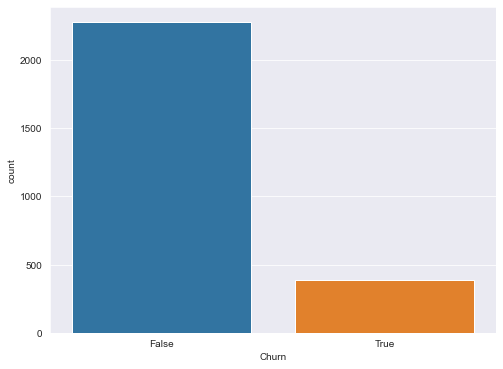

In [5]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Churn', data= df)
Labels= ('False', 'True')
plt.xticks(range(2), Labels)

In [6]:
X = df.drop(['Churn'],axis=1)
y = df['Churn'].values

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

Recall Score  0.06896551724137931
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       684
           1       0.53      0.07      0.12       116

    accuracy                           0.86       800
   macro avg       0.70      0.53      0.52       800
weighted avg       0.81      0.86      0.81       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

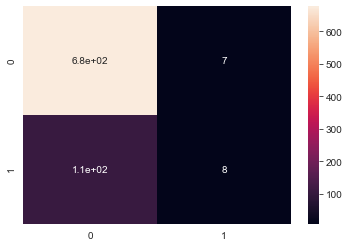

In [7]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [8]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1594 

After OverSampling, the shape of train_X: (544, 18)
After OverSampling, the shape of train_y: (544,) 

After OverSampling, counts of label '1': 272
After OverSampling, counts of label '0': 272


([<matplotlib.axis.XTick at 0x150657fddc0>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

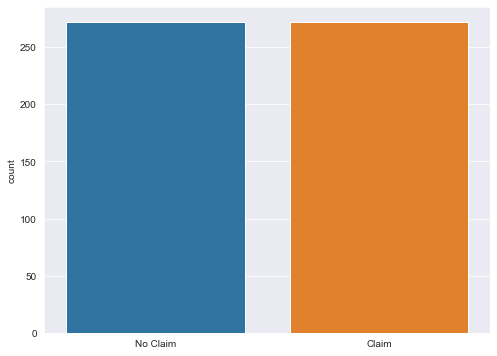

In [9]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Claim', 'Claim')
plt.xticks(range(2), Labels)

Recall Score  0.6982758620689655
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       684
           1       0.28      0.70      0.40       116

    accuracy                           0.69       800
   macro avg       0.60      0.70      0.60       800
weighted avg       0.84      0.69      0.74       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

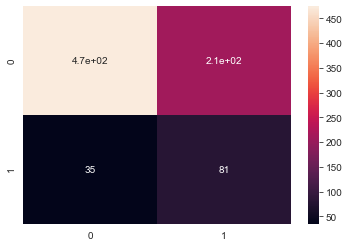

In [10]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomOverSampler()
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1594 

After OverSampling, the shape of train_X: (3188, 18)
After OverSampling, the shape of train_y: (3188,) 

After OverSampling, counts of label '1': 1594
After OverSampling, counts of label '0': 1594


([<matplotlib.axis.XTick at 0x150657fd0d0>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

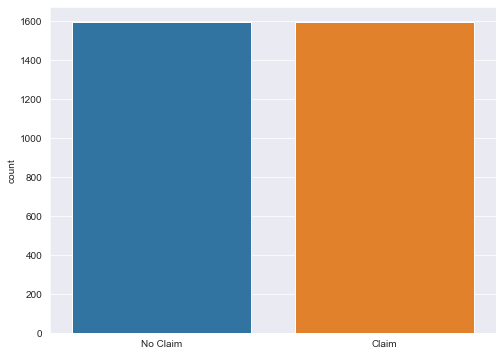

In [12]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Claim', 'Claim')
plt.xticks(range(2), Labels)

Recall Score  0.7155172413793104
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       684
           1       0.26      0.72      0.38       116

    accuracy                           0.66       800
   macro avg       0.60      0.69      0.58       800
weighted avg       0.83      0.66      0.71       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

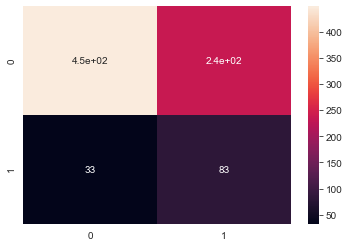

In [13]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [14]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
from imblearn.over_sampling import SMOTE
sm = SMOTE() 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1594 

After OverSampling, the shape of train_X: (3188, 18)
After OverSampling, the shape of train_y: (3188,) 

After OverSampling, counts of label '1': 1594
After OverSampling, counts of label '0': 1594


([<matplotlib.axis.XTick at 0x150669ae580>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

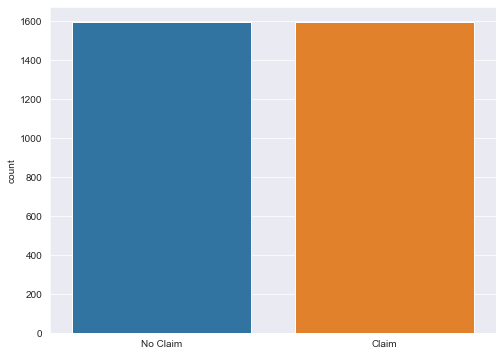

In [15]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Claim', 'Claim')
plt.xticks(range(2), Labels)

Recall Score  0.7068965517241379
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       684
           1       0.25      0.71      0.37       116

    accuracy                           0.65       800
   macro avg       0.59      0.68      0.57       800
weighted avg       0.83      0.65      0.70       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

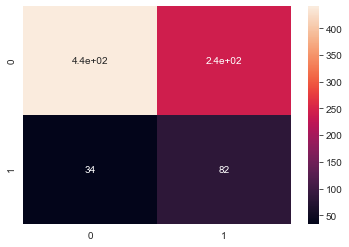

In [16]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [17]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 


# trying BorderLineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1594 

After OverSampling, the shape of train_X: (3188, 18)
After OverSampling, the shape of train_y: (3188,) 

After OverSampling, counts of label '1': 1594
After OverSampling, counts of label '0': 1594


([<matplotlib.axis.XTick at 0x15067143be0>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

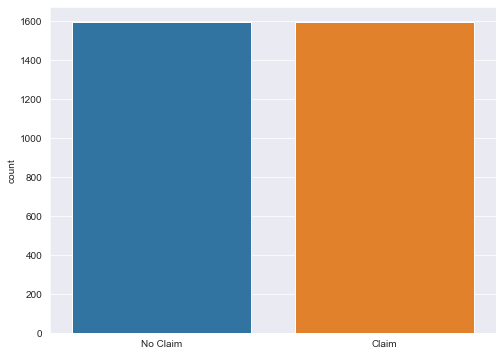

In [18]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Claim', 'Claim')
plt.xticks(range(2), Labels)

Recall Score  0.6810344827586207
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       684
           1       0.25      0.68      0.37       116

    accuracy                           0.66       800
   macro avg       0.59      0.67      0.57       800
weighted avg       0.83      0.66      0.71       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

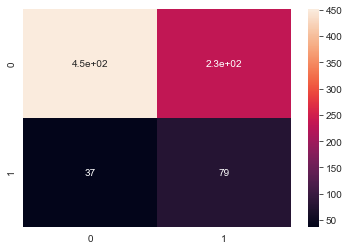

In [19]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [20]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# trying ADASYN
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1594 

After OverSampling, the shape of train_X: (3203, 18)
After OverSampling, the shape of train_y: (3203,) 

After OverSampling, counts of label '1': 1609
After OverSampling, counts of label '0': 1594


([<matplotlib.axis.XTick at 0x1506591d9a0>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

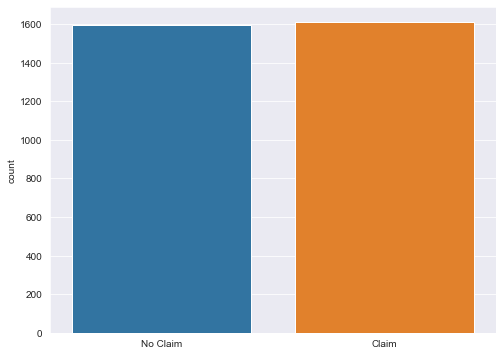

In [21]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Claim', 'Claim')
plt.xticks(range(2), Labels)

Recall Score  0.6724137931034483
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       684
           1       0.24      0.67      0.35       116

    accuracy                           0.64       800
   macro avg       0.58      0.65      0.55       800
weighted avg       0.82      0.64      0.69       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

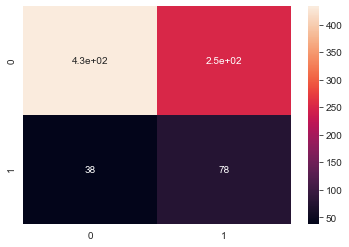

In [22]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# trying BorderLineSVM
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1594 

After OverSampling, the shape of train_X: (3188, 18)
After OverSampling, the shape of train_y: (3188,) 

After OverSampling, counts of label '1': 1594
After OverSampling, counts of label '0': 1594


([<matplotlib.axis.XTick at 0x15067314d90>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

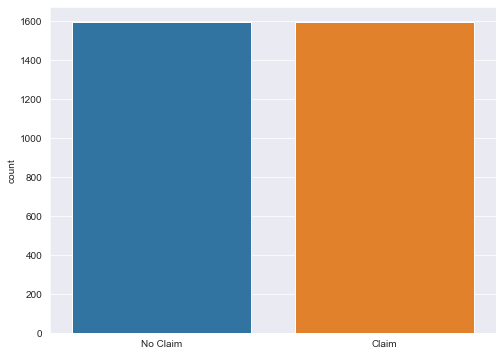

In [24]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Claim', 'Claim')
plt.xticks(range(2), Labels)

Recall Score  0.646551724137931
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       684
           1       0.27      0.65      0.38       116

    accuracy                           0.69       800
   macro avg       0.60      0.67      0.59       800
weighted avg       0.83      0.69      0.74       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

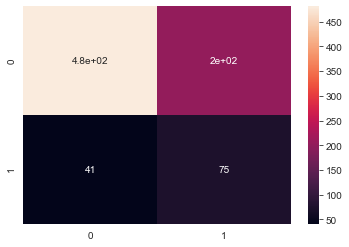

In [25]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [26]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 272
Before OverSampling, counts of label '0': 1594 

After OverSampling, the shape of train_X: (3179, 18)
After OverSampling, the shape of train_y: (3179,) 

After OverSampling, counts of label '1': 1594
After OverSampling, counts of label '0': 1585


([<matplotlib.axis.XTick at 0x150673e71f0>,
 [Text(0, 0, 'No Claim'), Text(1, 0, 'Claim')])

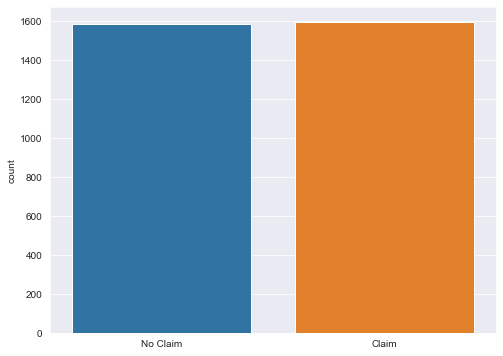

In [27]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('No Claim', 'Claim')
plt.xticks(range(2), Labels)

Recall Score  0.7068965517241379
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       684
           1       0.26      0.71      0.38       116

    accuracy                           0.66       800
   macro avg       0.59      0.68      0.57       800
weighted avg       0.83      0.66      0.71       800



C:\Users\Neha Chadaga\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

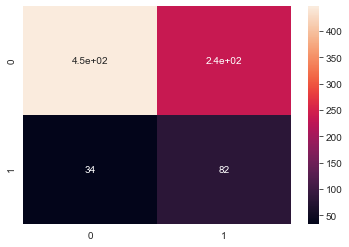

In [28]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')